In [1]:
import sys
import matplotlib.pyplot as plt
import vaex
import os
import numpy as np
import pandas as pd
from helpers import *
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
current_dir  = os.getcwd()
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
ticker_list = os.listdir(os.path.join(current_dir,"data","clean","flash_crash"))
if '.DS_Store' in ticker_list : ticker_list.remove('.DS_Store')
#Filter the period of the crash
crash_start_date = '2010-05-03'
crash_end_date = '2010-05-14'
ticker_list

['GS.N-2010',
 'AAPL.OQ-2010',
 'HD.N-2010',
 'DOW.N-2010',
 'PG.N-2010',
 'NKE.N-2010',
 'MSFT.OQ-2010',
 'AMGN.OQ-2010']

### Response Function

#### a) Apple 

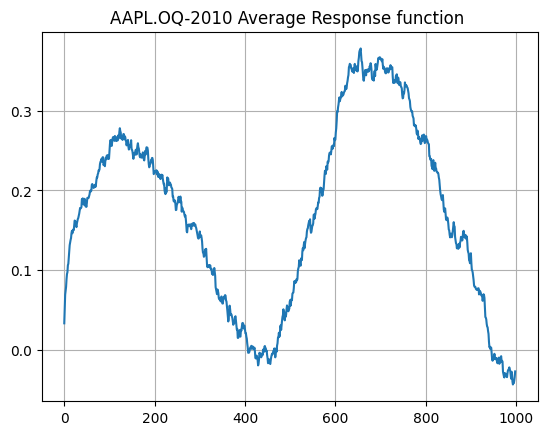

In [46]:
## Inspecting crash day
ticker_name = ticker_list[1]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df=vaex.open(os.path.join(file_dir,file_name))

df = df[(df['index'] >= crash_start_date) & (df['index'] <= crash_end_date)]
tau = 1000
df_copy = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")].copy()
df_copy = df_copy.to_pandas_df().set_index('index')
df_copy = setup_response_function_data(df_copy)
# plt.plot(compute_response_c(df_copy, tau=tau), label='Response Function')
plt.plot(compute_response(df_copy, tau_max=tau)[0], label='Response Function')
plt.title(ticker_name + " Average Response function ")
plt.grid()

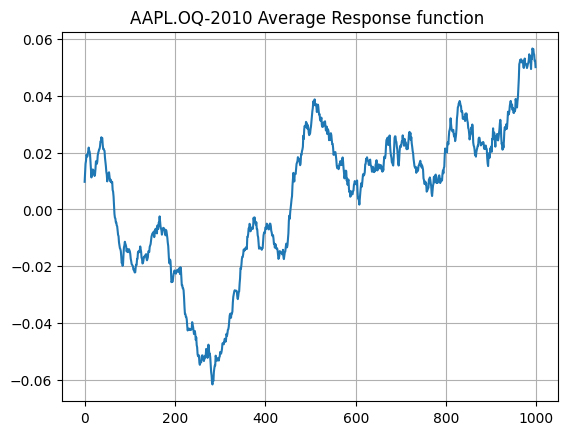

In [47]:
## Inspecting Normal day
ticker_name = ticker_list[1]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df=vaex.open(os.path.join(file_dir,file_name))

tau = 1000
df_copy = df[(df['index'] >= "2010-05-03") & (df['index'] <= "2010-05-04")].copy()
df_copy = setup_response_function_data(df_copy)
plt.plot(compute_response(df_copy, tau_max=tau)[0], label='Response Function')
plt.title(ticker_name + " Average Response function ")
plt.grid()

#### b) Microsoft

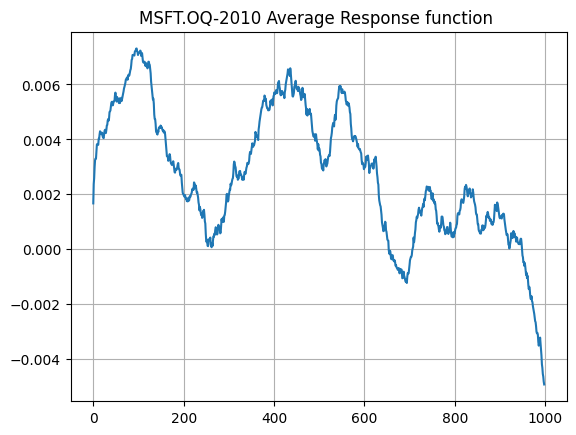

In [48]:
## Inspecting crash day
ticker_name = ticker_list[6]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df=vaex.open(os.path.join(file_dir,file_name))

tau = 1000
df_copy = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")].copy()
df_copy = setup_response_function_data(df_copy)
# plt.plot(compute_response_c(df_copy, tau=tau), label='Response Function')
plt.plot(compute_response(df_copy, tau)[0], label='Response Function')
plt.title(ticker_name + " Average Response function ")
plt.grid()

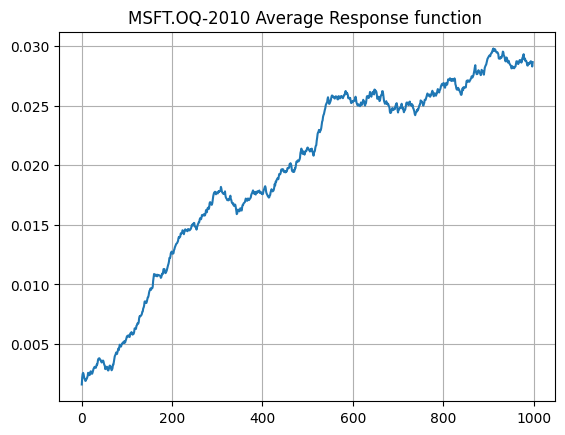

In [54]:
## Inspecting Normal day
ticker_name = ticker_list[6]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df=vaex.open(os.path.join(file_dir,file_name))

tau = 1000
df_copy = df[(df['index'] >= "2010-05-04") & (df['index'] <= "2010-05-05")].copy()
df_copy = setup_response_function_data(df_copy)
# plt.plot(compute_response_c(df_copy, tau=tau), label='Response Function')
plt.plot(compute_response(df_copy, tau)[0], label='Response Function')
plt.title(ticker_name + " Average Response function ")
plt.grid()

### Plots on 3 days interval

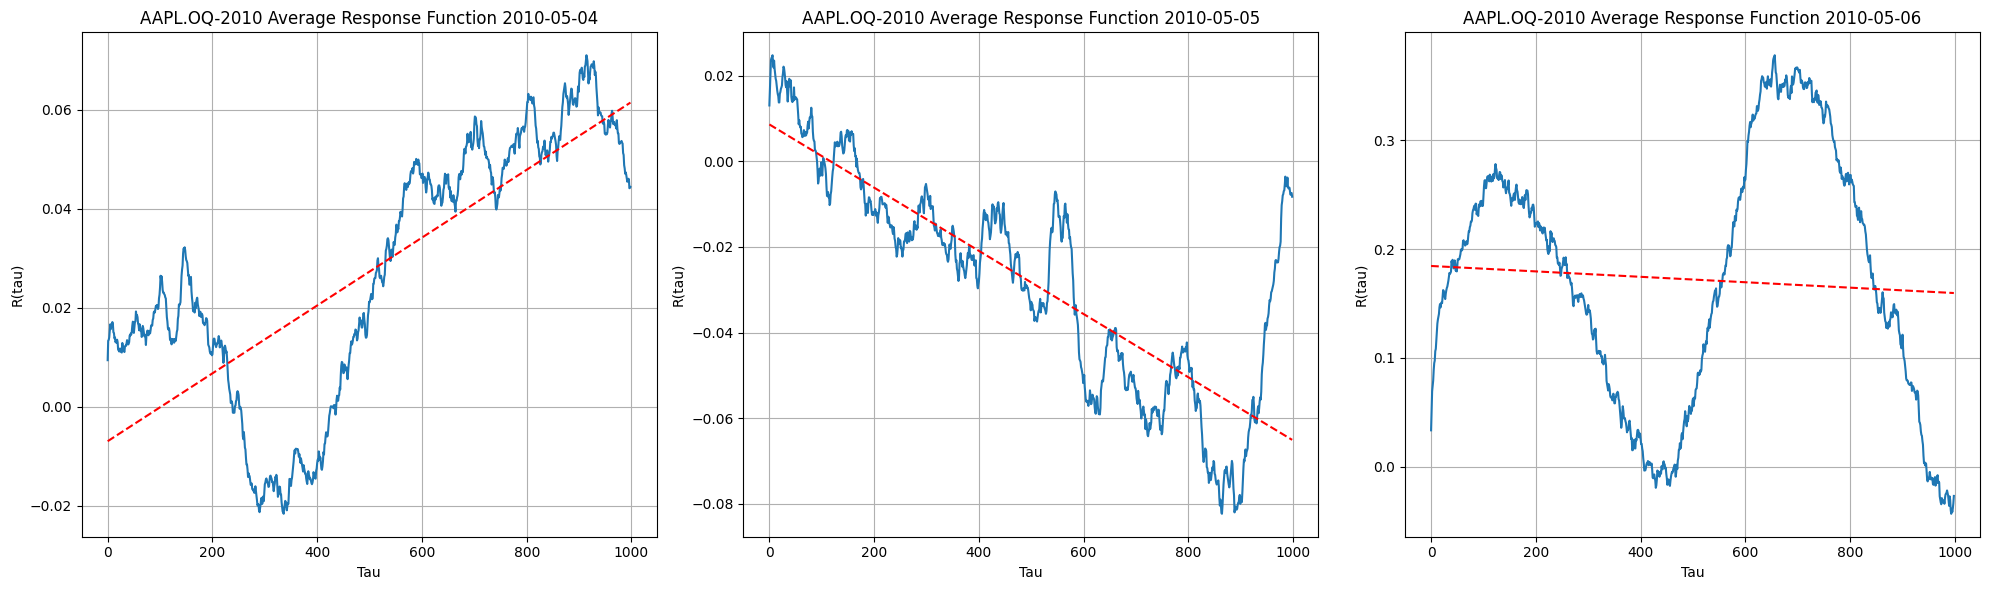

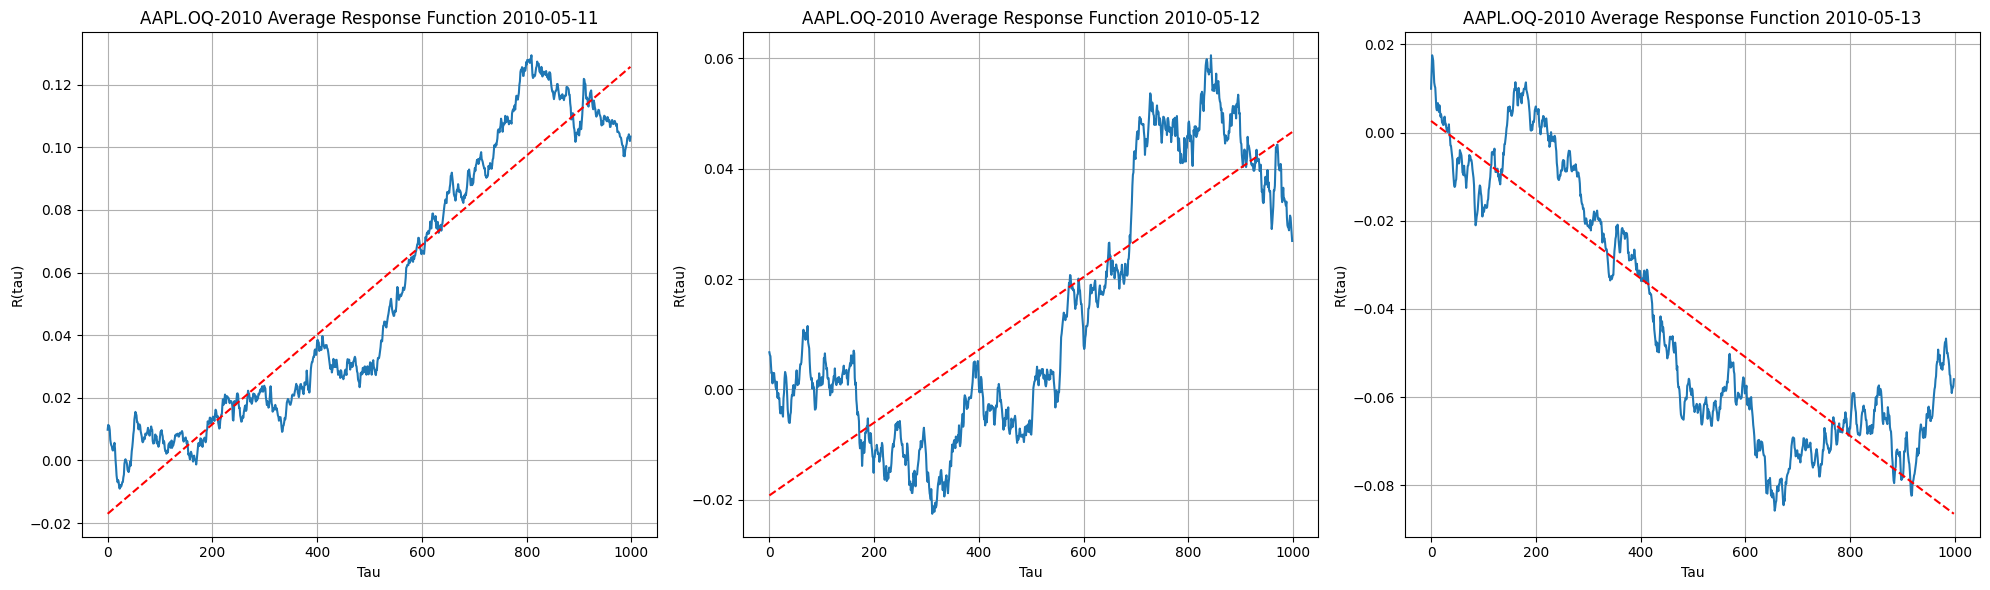

In [44]:
ticker_name =  ticker_list[1]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

start_date = '2010-05-04'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=20)
end_date = end_date.strftime('%Y-%m-%d')
df = df[(df['index'] >= start_date) & (df['index'] <= end_date)]

plot_3day_response_functions(df, tau_max =tau_max, ticker = ticker_name,start_date=start_date) #crash day
start_date = (pd.to_datetime(start_date) + pd.DateOffset(days=7)).strftime('%Y-%m-%d')
plot_3day_response_functions(df, tau_max =tau_max, ticker = ticker_name,start_date=start_date) #normal day

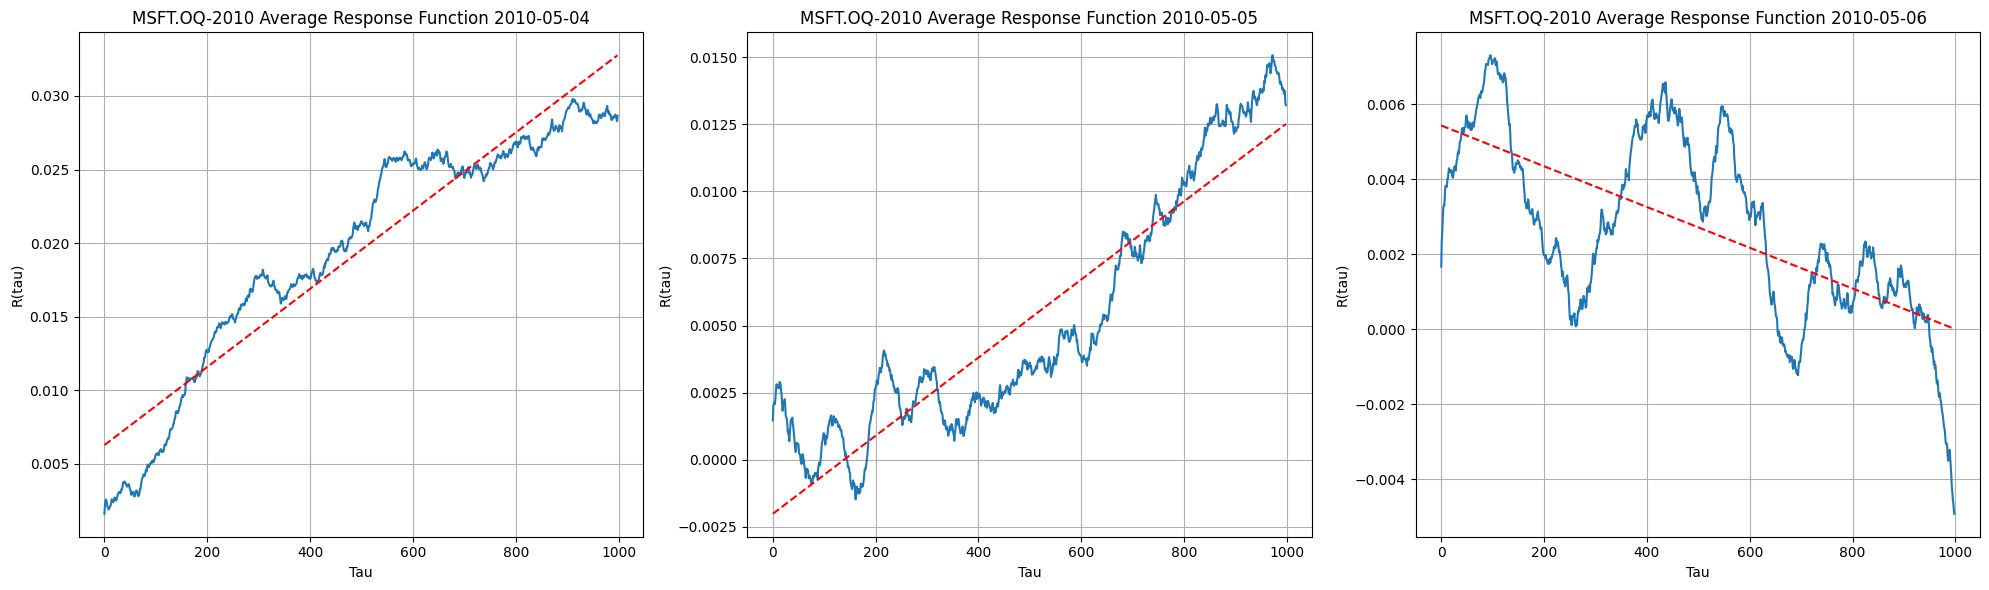

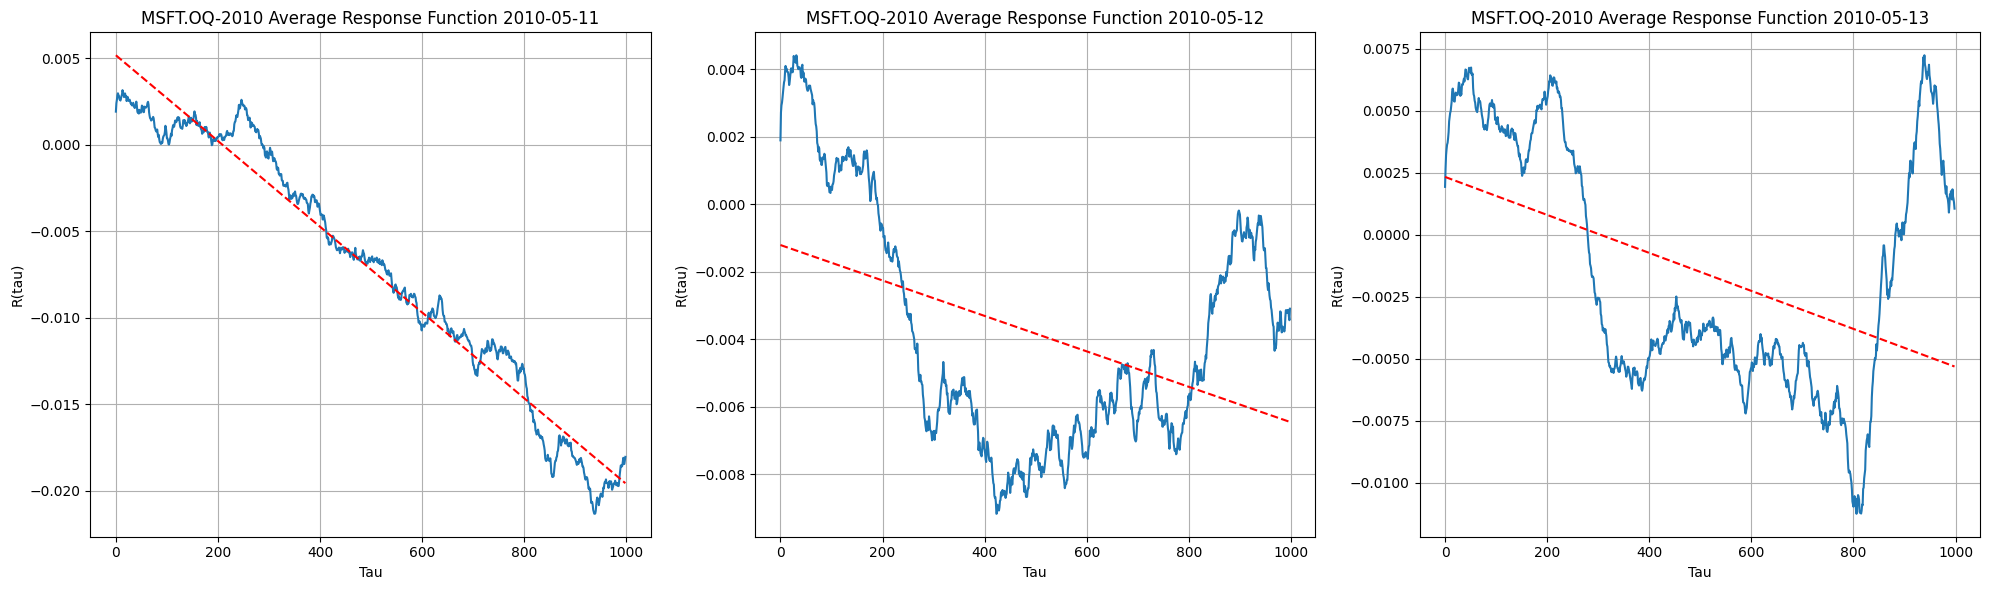

In [55]:
ticker_name =  ticker_list[6]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

start_date = '2010-05-04'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=20)
end_date = end_date.strftime('%Y-%m-%d')
df = df[(df['index'] >= start_date) & (df['index'] <= end_date)]

plot_3day_response_functions(df, tau_max =tau_max, ticker = ticker_name,start_date=start_date) #crash day
start_date = (pd.to_datetime(start_date) + pd.DateOffset(days=7)).strftime('%Y-%m-%d')
plot_3day_response_functions(df, tau_max =tau_max, ticker = ticker_name,start_date=start_date) #normal day

### Standard deviation of the response function

#### - Apple

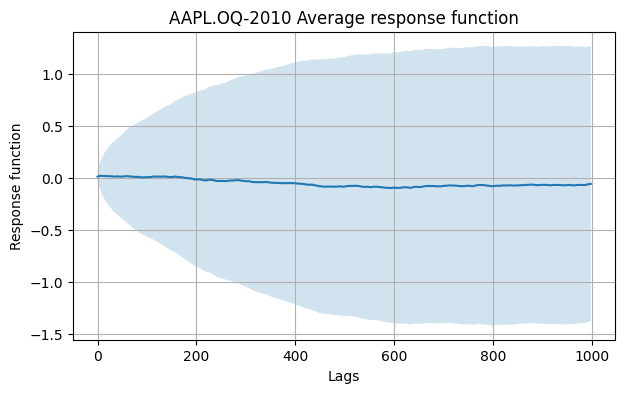

In [63]:
# Normal day
ticker_name =  ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
df = df[(df['index'] >= "2010-02-01") & (df['index'] <= "2010-02-02")]
plot_response_function(df, tau_max =tau_max, ticker = ticker_name,confidence_interval=True) #Normal day

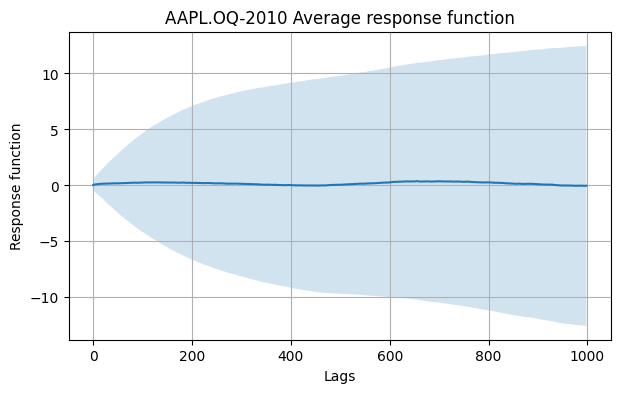

In [65]:
# Crash day
ticker_name =  ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
df = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")]
plot_response_function(df, tau_max =tau_max, ticker = ticker_name,confidence_interval=True) #Crash day

#### - Microsoft

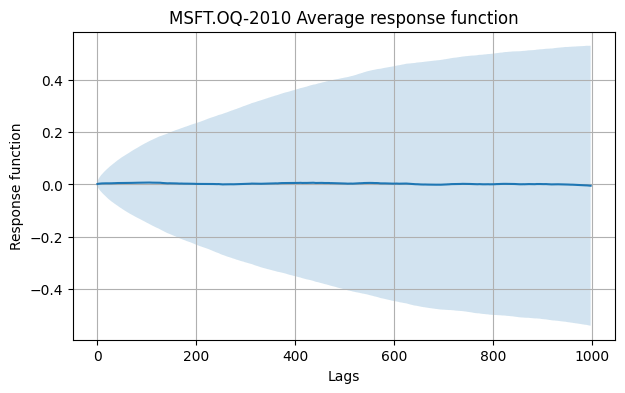

In [67]:
# Crash day
ticker_name =  ticker_list[6]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
df = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")]
plot_response_function(df, tau_max =tau_max, ticker = ticker_name,confidence_interval=True) #Crash day

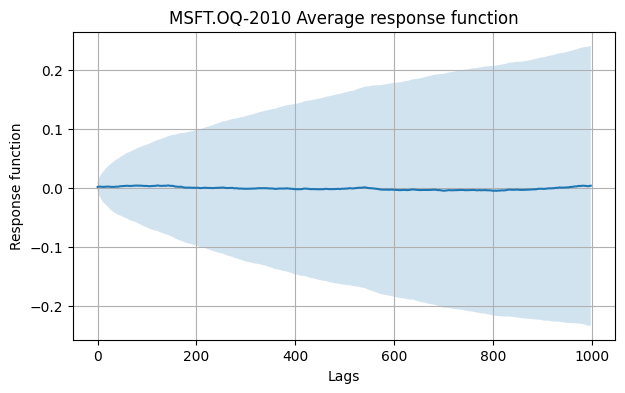

In [68]:
# Normal day
ticker_name =  ticker_list[6]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
df = df[(df['index'] >= "2010-02-01") & (df['index'] <= "2010-02-02")]
plot_response_function(df, tau_max =tau_max, ticker = ticker_name,confidence_interval=True) # Crash day

#### Discussion : 
We can see that the volatility of the response is significantly larger during the crash day in both GS and MSFT tickers.

Discussion: We notice important trends in crash days as opposed to normal days:
- Spread always very big (max - min is magnitudes higher than normal) (always valid)
- More fluctuations 
- Min or Max not bounded (depends on the ticker)

#### a) Buy - Sell Response Function

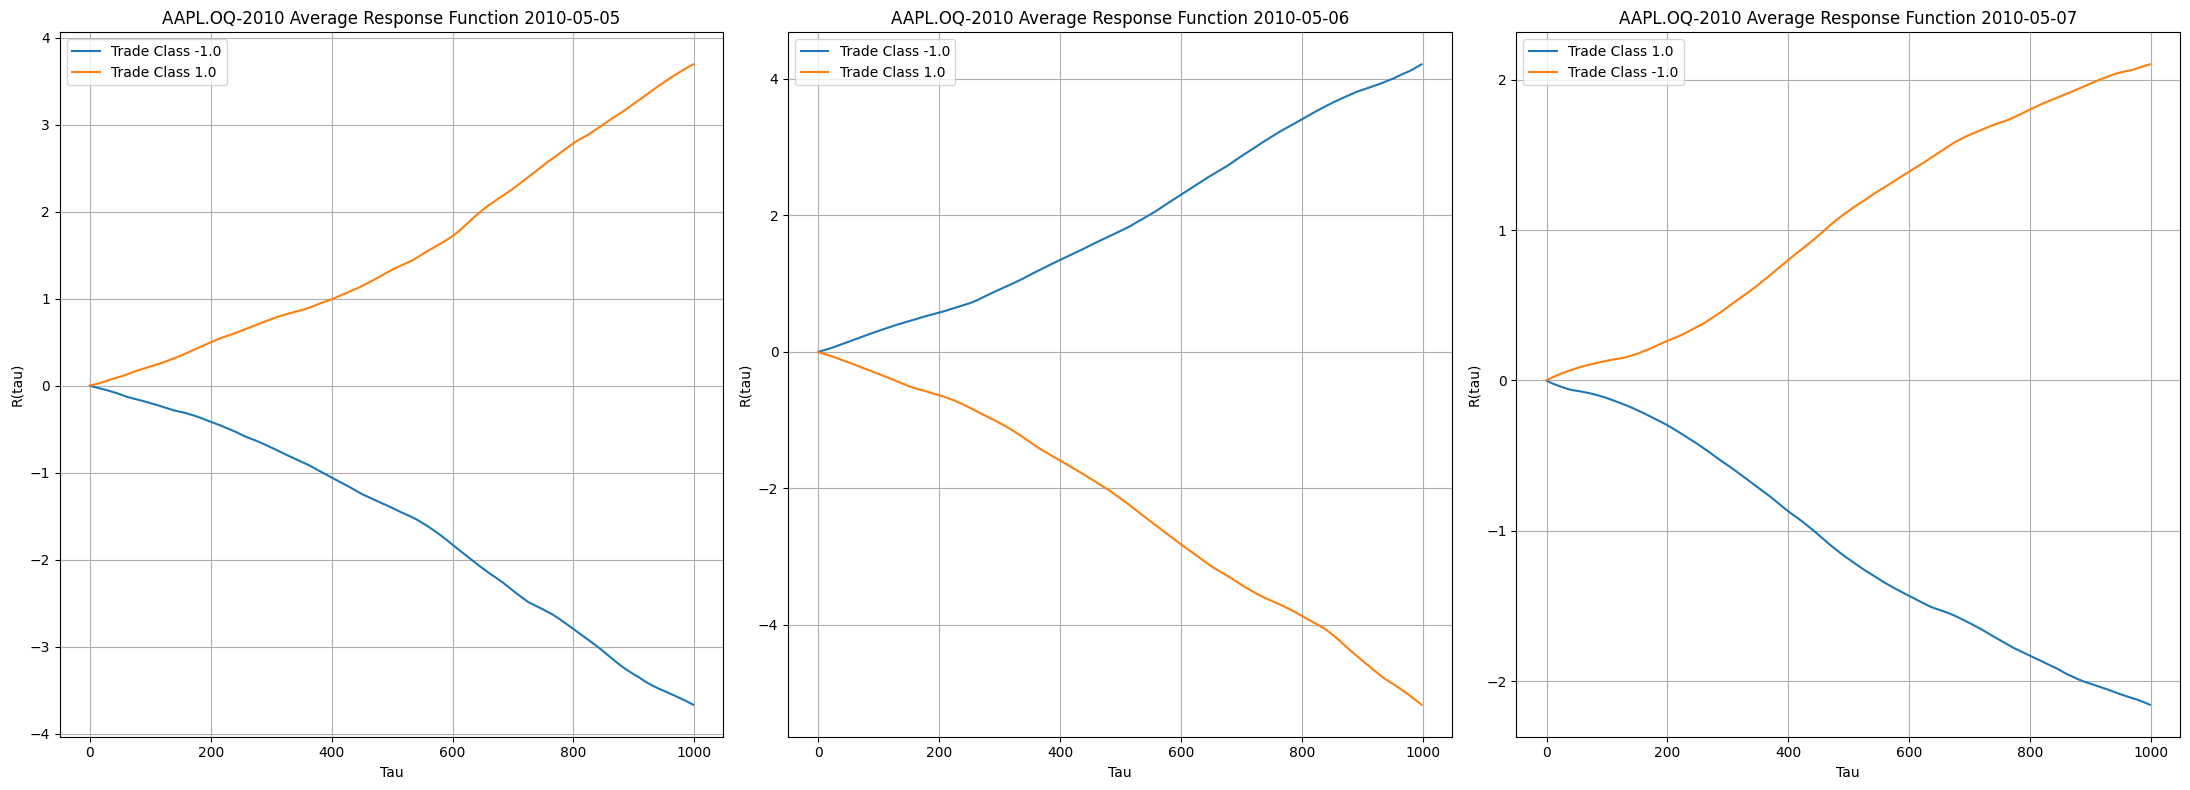

In [69]:
ticker_name =   ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

plot_3day_response_functions_split(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-05-05') #Crash day

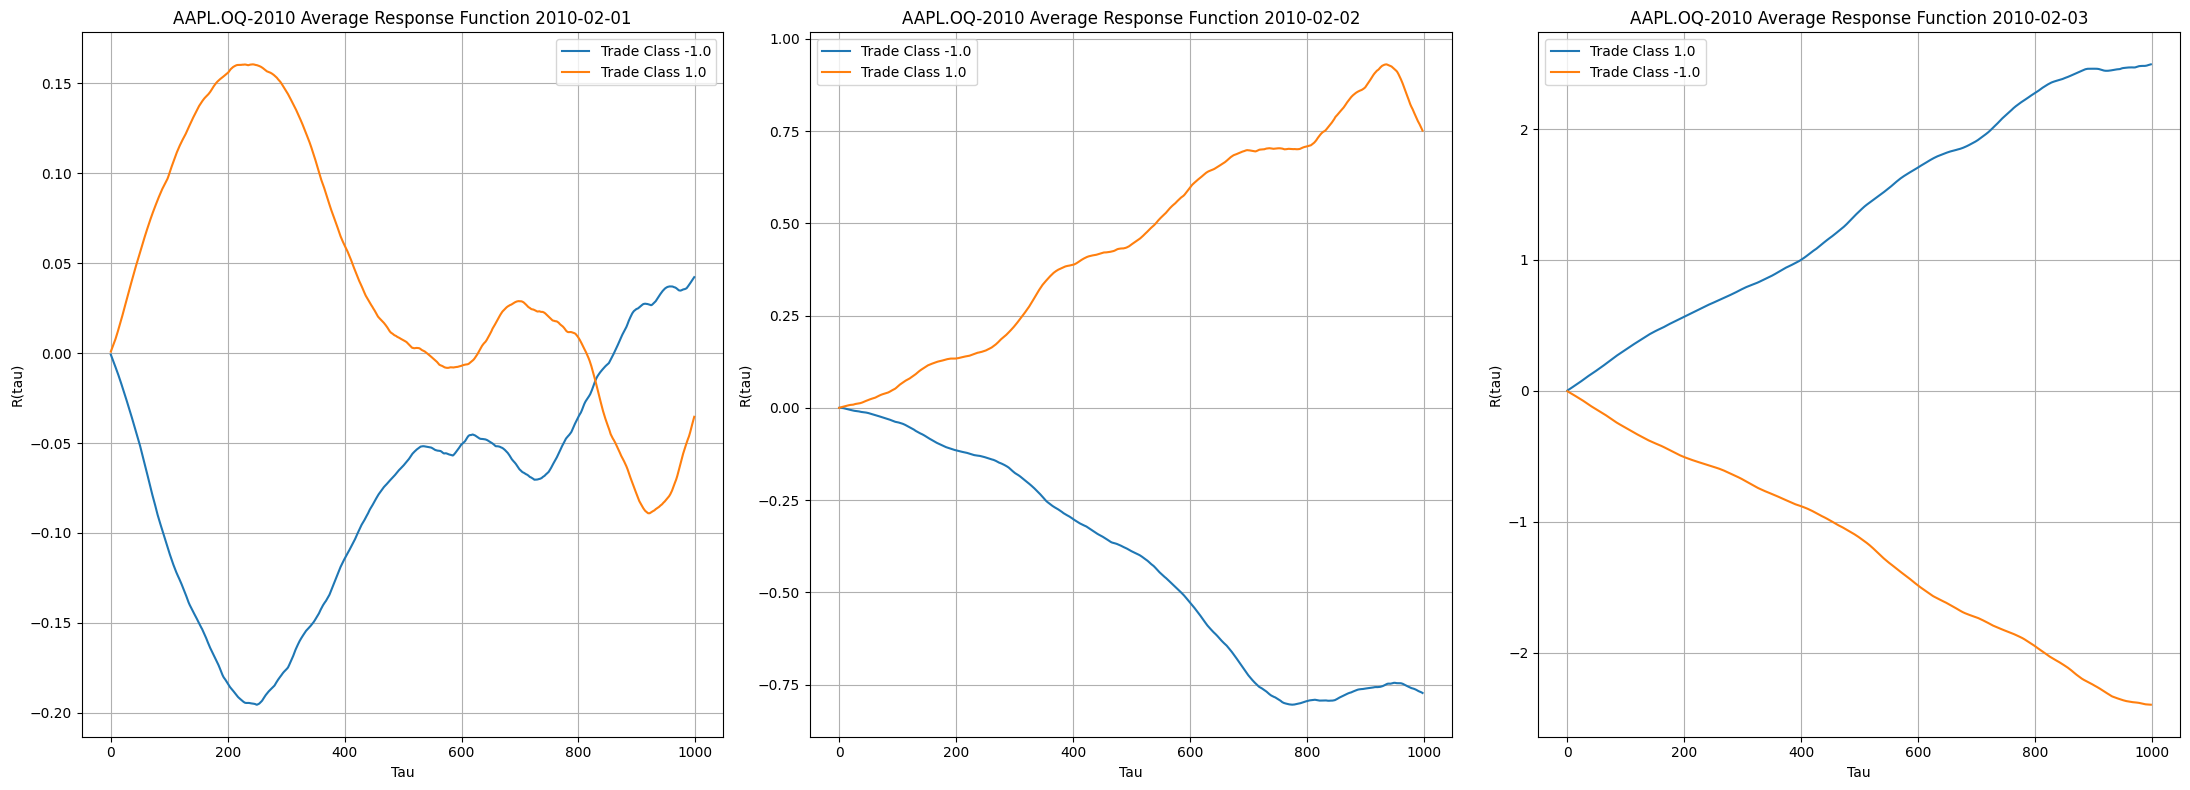

In [72]:
plot_3day_response_functions_split(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-02-01') #normal day

#### b) By Hour

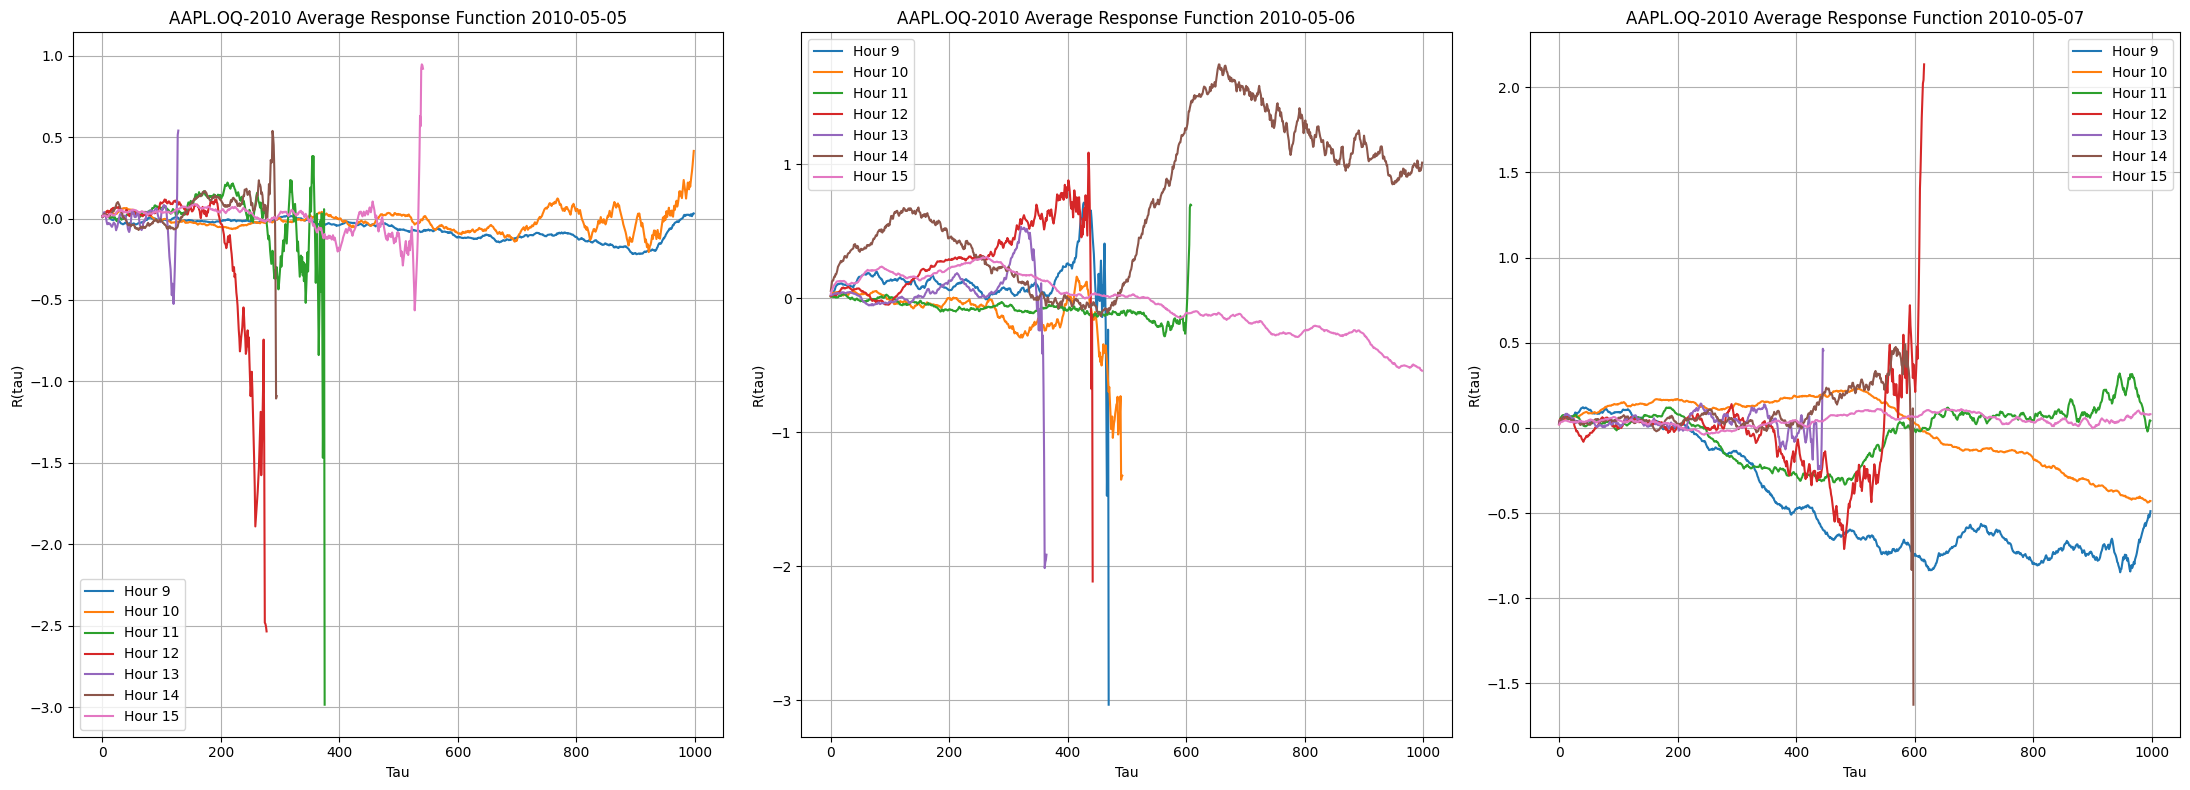

In [75]:
ticker_name =   ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
plot_3day_response_functions_hourly(df , tau_max =tau_max, ticker = ticker_name,start_date='2010-05-05') #Crash day

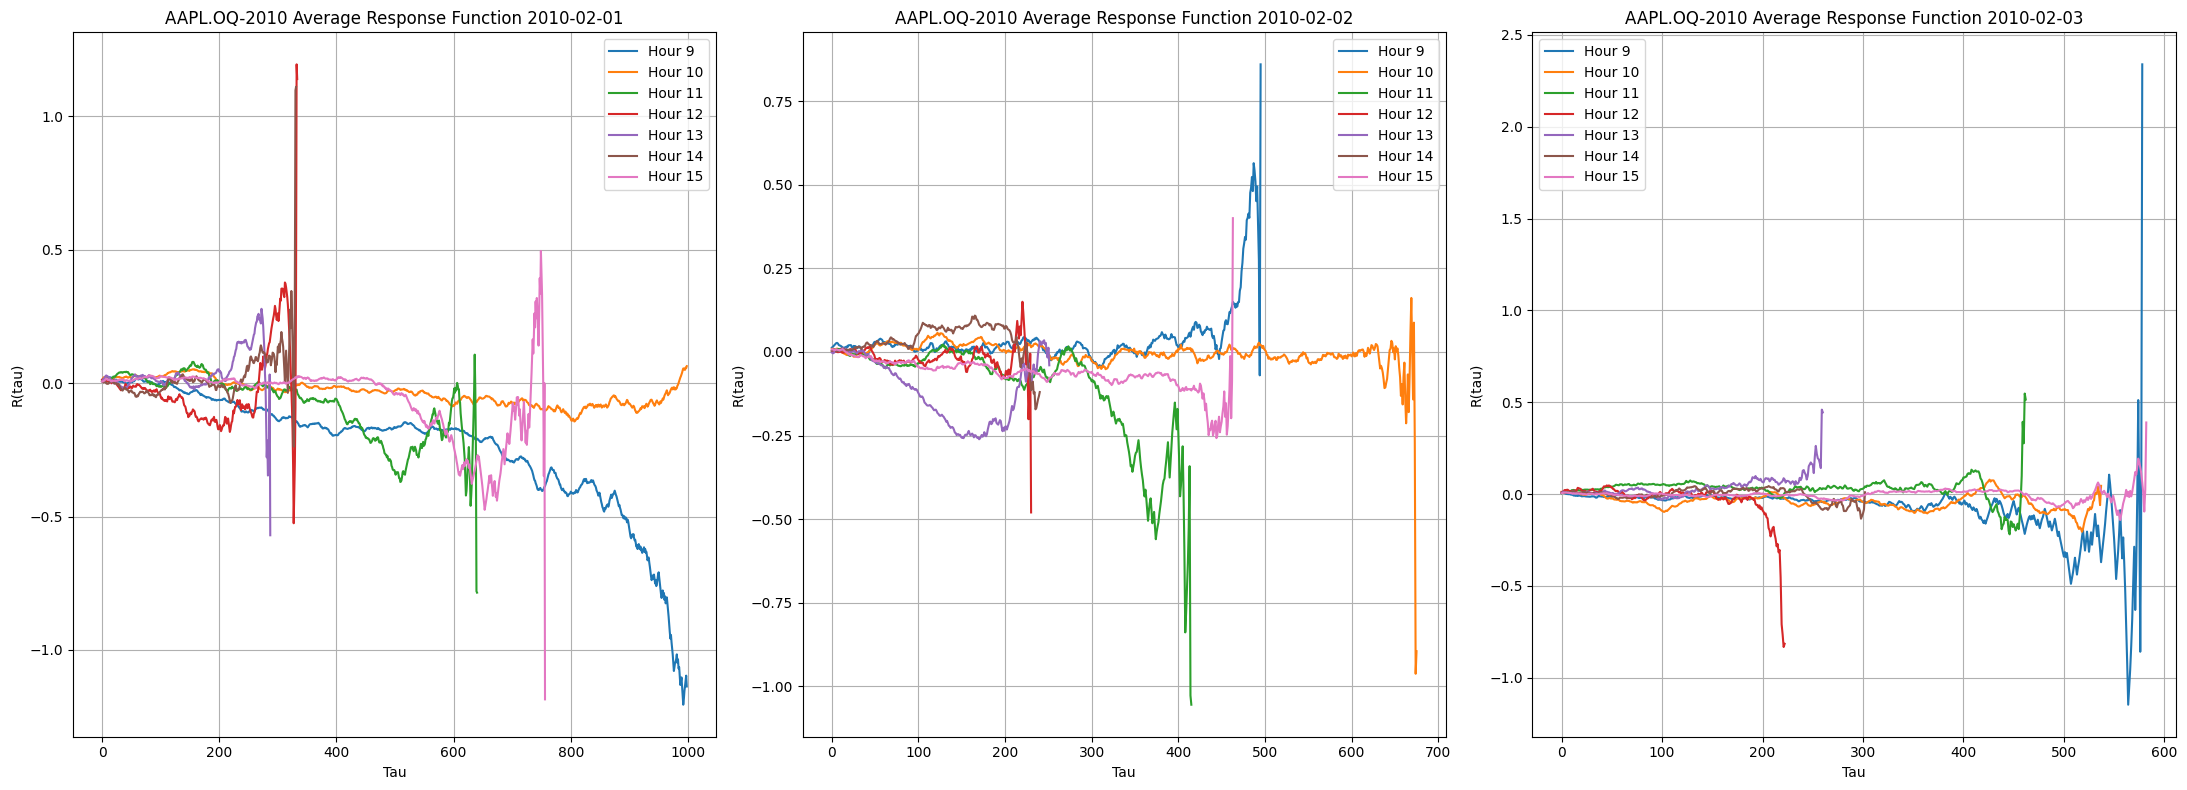

In [76]:
plot_3day_response_functions_hourly(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-02-01') #Normal day

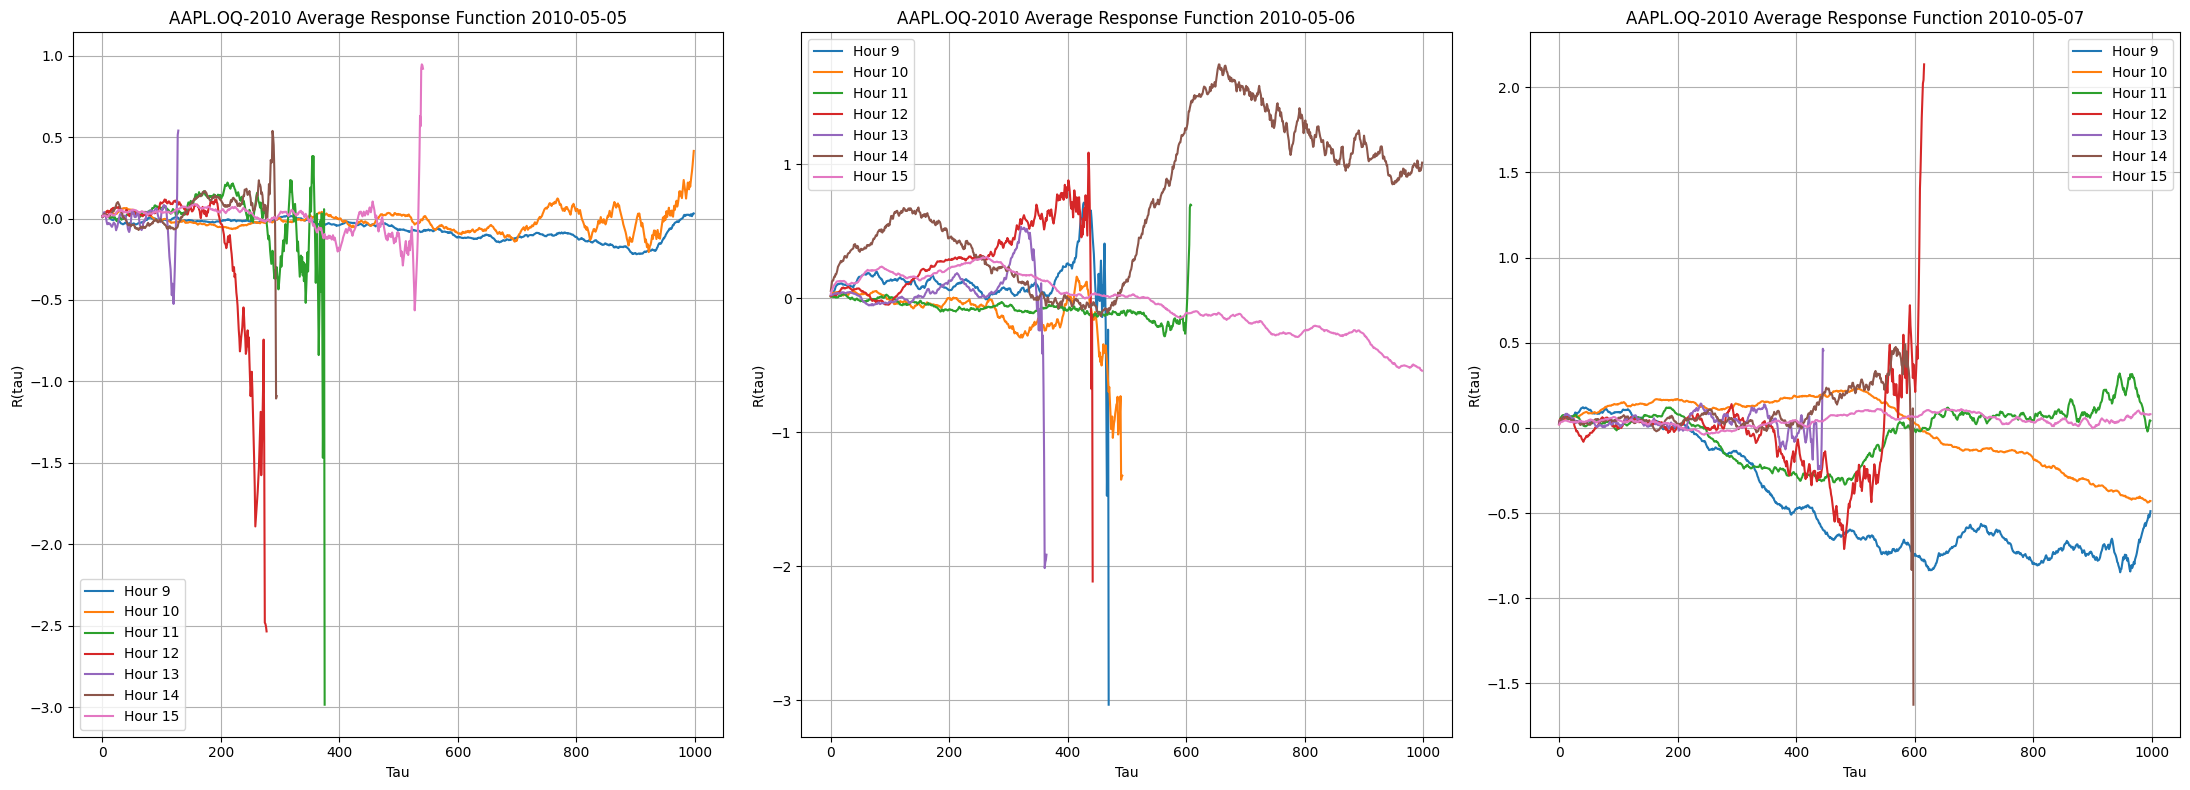

In [77]:
ticker_name =   ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

plot_3day_response_functions_hourly(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-05-05') #Crash day

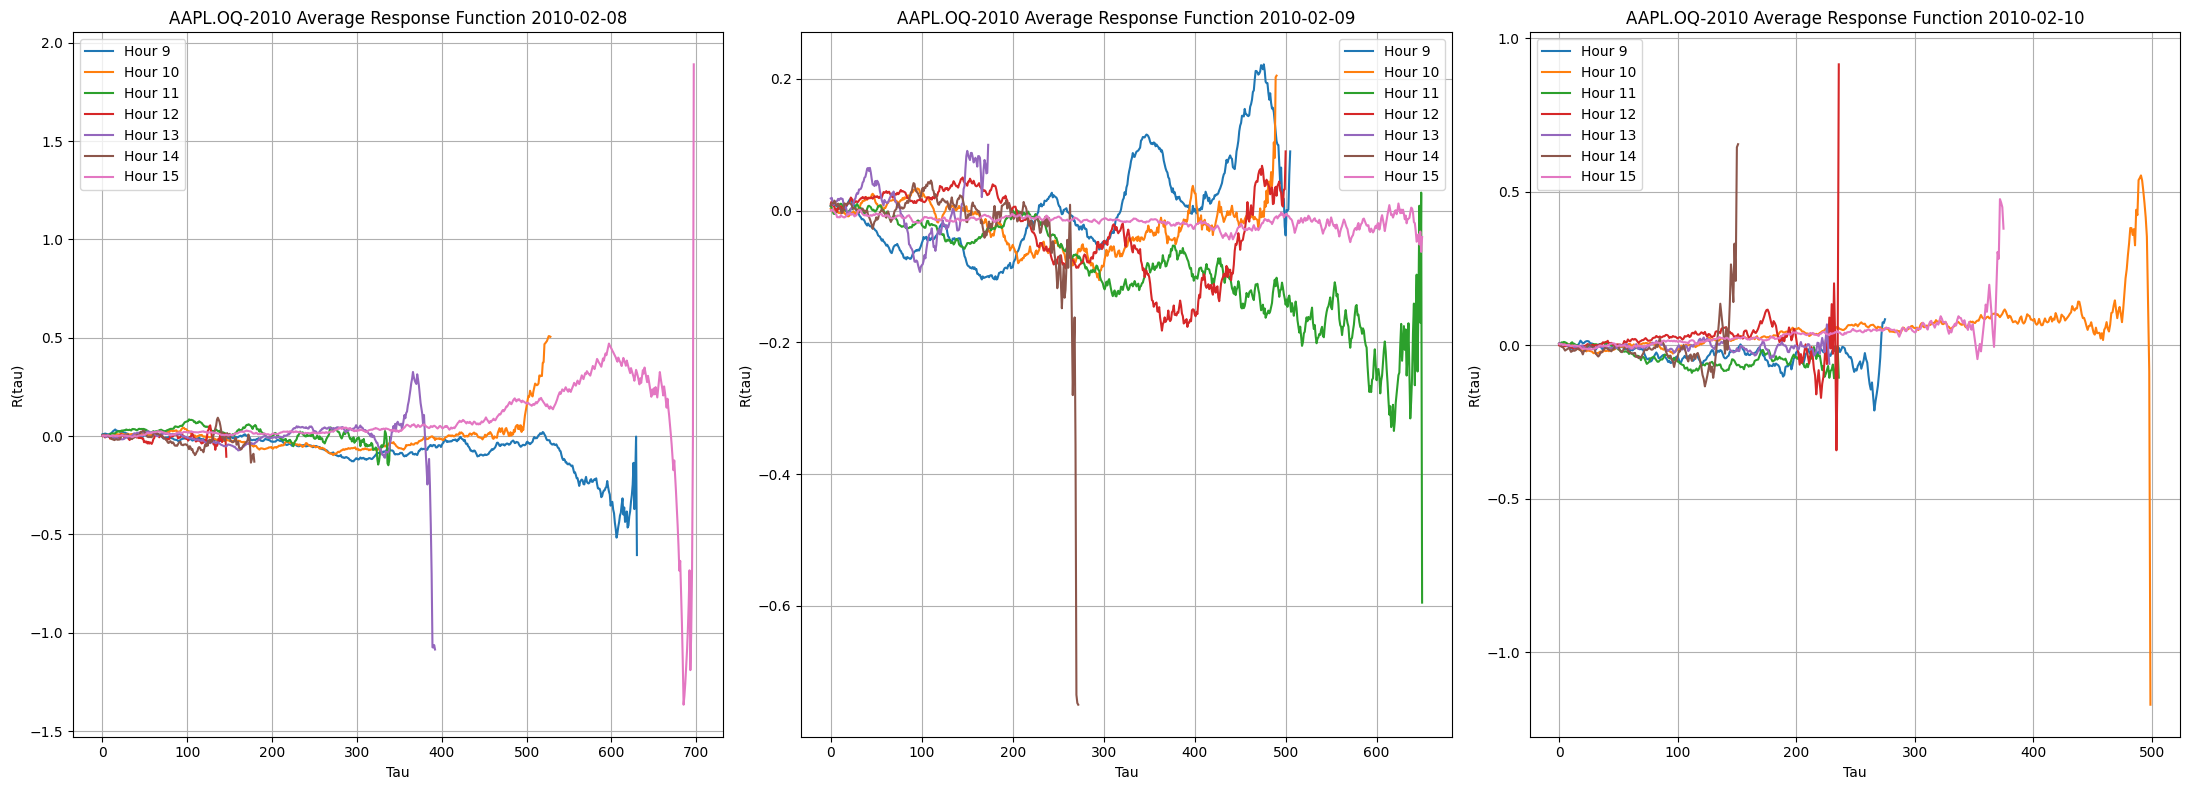

In [78]:
plot_3day_response_functions_hourly(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-02-08') #Normal day

#### c) By 15 minute intervals

In [80]:
def plot_3day_response_functions_15min(df, tau_max=1000, ticker="", start_date='2010-05-05'):
    end_date = pd.to_datetime(start_date) + pd.DateOffset(days=3)
    end_date = end_date.strftime('%Y-%m-%d')
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.index >= start_date) & (df_filtered.index <= end_date)]
    
    df_filtered = setup_response_function_data(df_filtered)
    # Create a Plotly subplot figure with 3 rows and 1 column
    fig = make_subplots(rows=3, cols=1, subplot_titles=[f'{ticker} Response Function {(pd.to_datetime(start_date) + pd.DateOffset(days=i))}' for i in range(3)])
    
    for i in range(3):
        start = pd.to_datetime(start_date).tz_localize('America/New_York') + pd.DateOffset(days=i)
        end = start + pd.DateOffset(days=1)
        df_day = df_filtered[(df_filtered.index >= start) & (df_filtered.index < end)]
        
        # Group the DataFrame by 15-minute intervals
        df_day_grouped = df_day.groupby(pd.Grouper(freq='15T'))
        
        for name, group in df_day_grouped:
            if not group.empty:
                group_clean = group.dropna(subset=['trade_class'])
                # Compute the average response function R(tau) for the group
                R ,R_std = compute_response(group_clean, tau_max)
                # Create a scatter plot for each group and add it to the corresponding subplot
                fig.add_trace(go.Scatter(x=list(range(len(R))), y=R, mode='lines', name=name.strftime('%H:%M')), row=i+1, col=1)
        
        # Update x-axis and y-axis labels
        fig.update_xaxes(title_text='Tau', row=i+1, col=1)
        fig.update_yaxes(title_text='R(tau)', row=i+1, col=1)

    # Update layout and show the figure
    fig.update_layout(height=600, width=1200, title_text=f'{ticker} Response Functions', showlegend=True)
    fig.show()

In [82]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ticker_name =   ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

plot_3day_response_functions_15min(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-05-05')

In [83]:
ticker_name =   ticker_list[6]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

plot_3day_response_functions_15min(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-05-05')

#### Market Response as a function of volume trade

Text(0.5, 1.0, 'AAPL.OQ-2010 Average response function R(1,V)')

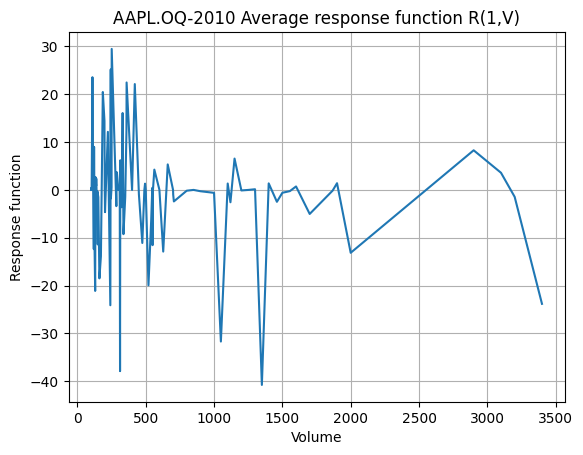

In [84]:
ticker_name =  ticker_list[1]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))

df = df[(df['index'] >= "2010-05-05") & (df['index'] <= "2010-05-06")] #Normal day
df = setup_response_function_data(df)
tau = 1
R = compute_response_volume(df, tau=tau)
R = sorted(R, key=lambda x: x[0])
R = [(volume, R_tau) for volume, R_tau in R if not np.isnan(R_tau)]
x = [i[0] for i in R]
y = [i[1] for i in R]
plt.plot(x, y)
plt.xlabel('Volume')
plt.ylabel('Response function')
plt.grid()
plt.title(ticker_name + f' Average response function R({tau},V)')

Text(0.5, 1.0, 'AAPL.OQ-2010 Average response function R(1,V)')

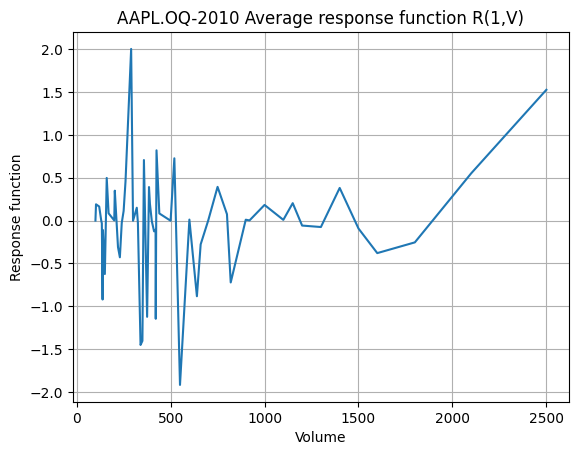

In [86]:
ticker_name =  ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))

df = df[(df['index'] >= "2010-02-02") & (df['index'] <= "2010-02-03")] #Crash day
df = setup_response_function_data(df)
tau = 1
R = compute_response_volume(df, tau=tau)
R = sorted(R, key=lambda x: x[0])
R = [(volume, R_tau) for volume, R_tau in R if not np.isnan(R_tau)]
x = [i[0] for i in R]
y = [i[1] for i in R]
plt.plot(x, y)
plt.xlabel('Volume')
plt.ylabel('Response function')
plt.grid()
plt.title(ticker_name + f' Average response function R({tau},V)')

Discussion : 
Even though there is no clear pattern, we can notice the huge difference in magnitude between the normal day and the crash day.

#### e) ECDF of Response Function

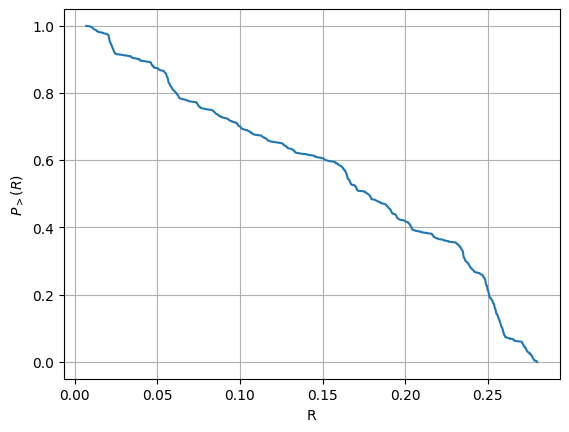

In [87]:
#Crash day
ticker_name =  ticker_list[0]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

df = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")]
df = setup_response_function_data(df)
R,_ = compute_response(df, tau_max)

x=R
ecdf_r=ECDF(x)
plt.plot(ecdf_r.x,1-ecdf_r.y)
plt.xlabel("R")
plt.ylabel("$P_>(R)$")
plt.grid()
plt.show()

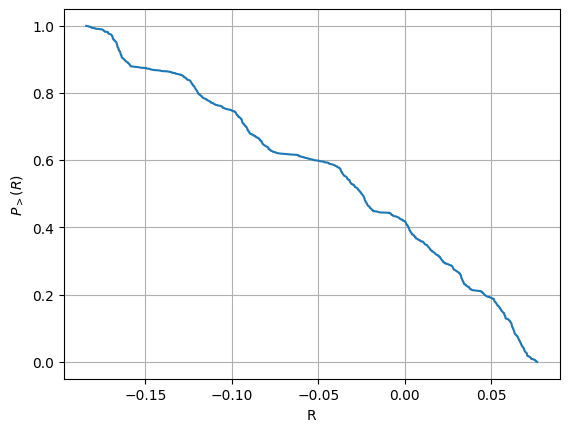

In [89]:
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

df = df[(df['index'] >= "2010-02-01") & (df['index'] <= "2010-02-02")]
df = setup_response_function_data(df)
R,_ = compute_response(df, tau_max)
x=R
ecdf_r=ECDF(x)
plt.plot(ecdf_r.x,1-ecdf_r.y)
plt.xlabel("R")
plt.ylabel("$P_>(R)$")
plt.grid()
plt.show()

#### Discussion :
The plot of ECDF further demonstrates the signifance of the response function magnitude during a crash day.

#### Conclusion :
From the previous data analysis, we established some trends in market response functions that we will use later on to predict a flash crash. 